In [1]:

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [35]:
%pylab inline
import os.path as op
import sys
import os


import json

Populating the interactive namespace from numpy and matplotlib


## Import openslide

In [36]:
pth = op.expanduser(r"~\Downloads\openslide\openslide-win64\bin")
# pth = op.expanduser(r"~\projects\scaffan\devel\knihovny")
# pth = op.expanduser(r"~\Miniconda3\envs\lisa36\Library\bin")
sys.path.insert(0, pth)
orig_PATH = os.environ["PATH"]
os.environ["PATH"] = pth + ";" + os.environ["PATH"]

In [37]:
# import numpy as np
import openslide as opsl

## Import lxml 

Doesnt work :-( #TODO

In [38]:

# os.environ["PATH"] = orig_PATH

In [39]:
#import lxml
#from lxml import etree


In [40]:
# dir(lxml)
# from lxml import etree 

# annotation_file = "e:data/scaffold/Hamamatsu/PIG-003_J-18-0165_HE.ndpi.ndpa"
# etree.parse(annotation_file)

In [41]:
# import lxml.etree

# Work with image data

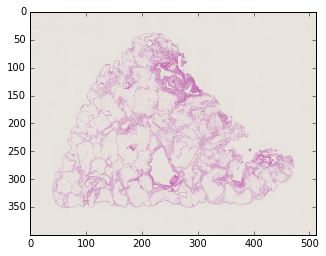

In [42]:
pth = r"E:\data\scaffold\Hamamatsu\PIG-003_J-18-0165_HE.ndpi"
imsl = opsl.OpenSlide(pth)
imthumb = imsl.get_thumbnail((512, 512))

plt.imshow(imthumb)

In [43]:
imsl.level_count

9

In [44]:
imsl.level_dimensions

((57344, 44800),
 (28672, 22400),
 (14336, 11200),
 (7168, 5600),
 (3584, 2800),
 (1792, 1400),
 (896, 700),
 (448, 350),
 (224, 175))

In [45]:
imsl.level_downsamples

(1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0)

In [46]:
pm = imsl.properties
list(pm.keys())

['hamamatsu.AHEX[0]',
 'hamamatsu.AHEX[0].fluorescence',
 'hamamatsu.AHEX[0].ploidy',
 'hamamatsu.AHEX[1]',
 'hamamatsu.AHEX[1].fluorescence',
 'hamamatsu.AHEX[1].ploidy',
 'hamamatsu.AHEX[2]',
 'hamamatsu.AHEX[2].fluorescence',
 'hamamatsu.AHEX[2].ploidy',
 'hamamatsu.Created',
 'hamamatsu.MHLN[0].24bit',
 'hamamatsu.MHLN[0].36bit',
 'hamamatsu.MHLN[1].24bit',
 'hamamatsu.MHLN[1].36bit',
 'hamamatsu.MHLN[2].24bit',
 'hamamatsu.MHLN[2].36bit',
 'hamamatsu.Macro.S/N',
 'hamamatsu.NDP.S/N',
 'hamamatsu.Objective.Lens.Magnificant',
 'hamamatsu.PSHV',
 'hamamatsu.PSHV.10x',
 'hamamatsu.PSHV.40x',
 'hamamatsu.PSHV.ploidy',
 'hamamatsu.PSHV.ploidy.10x',
 'hamamatsu.Product',
 'hamamatsu.Reference',
 'hamamatsu.SourceLens',
 'hamamatsu.Updated',
 'hamamatsu.XOffsetFromSlideCentre',
 'hamamatsu.YOffsetFromSlideCentre',
 'hamamatsu.YRNP[0]',
 'hamamatsu.YRNP[1]',
 'hamamatsu.YRNP[2]',
 'hamamatsu.calibration.version',
 'hamamatsu.ccd.height',
 'hamamatsu.ccd.width',
 'hamamatsu.ccd.width.ploidy

In [47]:
list(pm.items())

[('hamamatsu.AHEX[0]',
  '70261846BD036C2A1849BC016C211C44B80468191837B909681D143BB10264160C36B50B60261041B00C5C270446B00A5C190435B10364160C3AB000602B0C4CB00C641D1043B50368151839B80268141438B8066C161C3FB40C6C14203BB800E819'),
 ('hamamatsu.AHEX[0].fluorescence',
  '000700000023000300000027010B0000002B01170000001B010F0000001F011B00000017010F0000003301130000002F01230000001F012300000023010F0000002F012700000023012B00000023012F00000027012B0000002F01270000002711FC'),
 ('hamamatsu.AHEX[0].ploidy',
  '7C21183FB1097823183FB10778191C3FB103740F1C2FB10F74131433A907700F0C2FA90F6C1F103BA809681F043FA807680F042FA907700B0C33A9036C210C47A80B7011103FAD03740B1833B00074071433B003740B1C3BAC0B78072437B0002232'),
 ('hamamatsu.AHEX[1]',
  '7C282446C001742C244BC00574202844C007701C2439C108741E203BB80170181834B90868281C40B80E64291045B40C641C1036B9026C181839B803682F184CB80F6C1E1C43B80074192437BC0470182035BC09741A2840BC0E74182C3CBC05954F'),
 ('hamamatsu.AHEX[1].fluorescence',
  '000000000027000000000027010F0000002B0

## Resolution

In [48]:
resolution_unit = pm.get("tiff.ResolutionUnit")
resolution_x= pm.get("tiff.XResolution")
resolution_y= pm.get("tiff.YResolution")
print("Resolution {}x{} pixels/{}".format(resolution_x, resolution_y, resolution_unit))

Resolution 44005x43953 pixels/centimeter


In [49]:
imsl.dimensions

(57344, 44800)

In [93]:
# my annotataion area

location = (19000, 10000)
level = 4
size = (1200, 900)

In [97]:
# one lobulus

location = (19000, 10000)
level = 4
size = (400, 400)

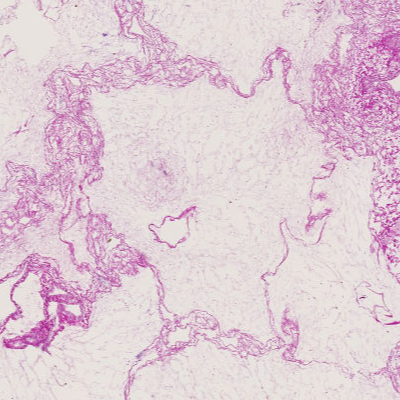

In [98]:
imcr = imsl.read_region(location, level, size)
imcr

In [99]:
im = np.asarray(imcr)

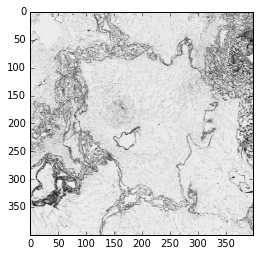

In [100]:
import skimage
import skimage.color
import skimage.filters
imgr = skimage.color.rgb2gray(im)
imshow(imgr, cmap='gray')

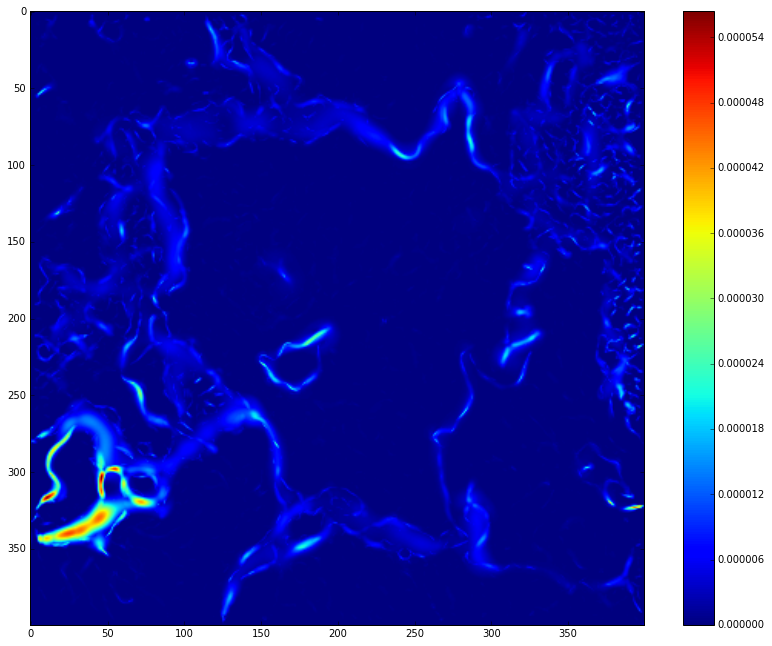

In [101]:
imgr_frangi = skimage.filters.frangi(imgr)
plt.figure(figsize=(14,11))
imshow(imgr_frangi)
colorbar()

In [102]:
def circle_level_set(shape, center, sqradius, scalerow=1.0):
    """Build a binary function with a circle as the 0.5-levelset."""
    grid = np.mgrid[list(map(slice, shape))].T - center
    phi = sqradius - np.sqrt(np.sum((grid.T)**2, 0))
    u = np.float_(phi > 0)
    return u

C:\Users\miros\Miniconda3\envs\lisa36\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\miros\Miniconda3\envs\lisa36\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


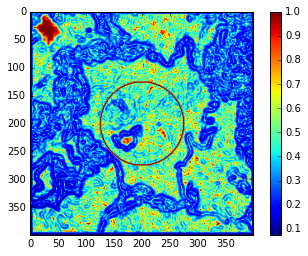

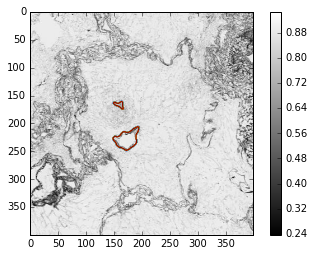

In [120]:

import morphsnakes as ms
#     logging.info('Running: example_starfish (MorphGAC)...')
    
    # Load the image.
#     imgcolor = imread(PATH_IMG_STARFISH) / 255.0
#     img = rgb2gray(imgcolor)
    
    # g(I)
# gimg = ms.inverse_gaussian_gradient(imgr_frangi, alpha=1000, sigma=2)
    
# Initialization of the level-set.
# init_ls = circle_level_set(imgr_frangi.shape, (200, 200), 85)

# Callback for visual plotting
# callback = ms.visual_callback_2d(imgcolor)
gb = ms.gborders(imgr_frangi, alpha=1000, sigma=2)
gb = ms.gborders(imgr, alpha=1000, sigma=2)
mgac = ms.MorphGAC(gb, smoothing=2, threshold=0.3, balloon=-1)

mgac.levelset = circle_level_set(imgr_frangi.shape, (200, 200), 75, scalerow=0.75)
plt.figure()
plt.imshow(gb)
plt.colorbar()
plt.contour(mgac.levelset)
mgac.run(iterations=110)
plt.figure()
plt.imshow(imgr, cmap="gray")
plt.colorbar()
plt.contour(mgac.levelset)
inner = mgac.levelset
# ms.evolve(mgac, num_iters=110, background=imgr)

# # MorphGAC. 
# ms.MorphGAC(imgr_frangi, iterations=100, 
#                                          init_level_set=init_ls,
#                                          smoothing=2, threshold=0.3,
#                                          balloon=-1)#, iter_callback=callback)

C:\Users\miros\Miniconda3\envs\lisa36\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\miros\Miniconda3\envs\lisa36\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


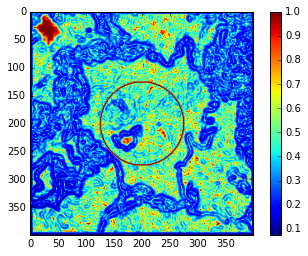

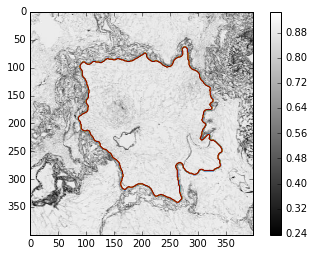

In [121]:

import morphsnakes as ms
#     logging.info('Running: example_starfish (MorphGAC)...')
    
    # Load the image.
#     imgcolor = imread(PATH_IMG_STARFISH) / 255.0
#     img = rgb2gray(imgcolor)
    
    # g(I)
# gimg = ms.inverse_gaussian_gradient(imgr_frangi, alpha=1000, sigma=2)
    
# Initialization of the level-set.
# init_ls = circle_level_set(imgr_frangi.shape, (200, 200), 85)

# Callback for visual plotting
# callback = ms.visual_callback_2d(imgcolor)
gb = ms.gborders(imgr_frangi, alpha=1000, sigma=2)
gb = ms.gborders(imgr, alpha=1000, sigma=2)
mgac = ms.MorphGAC(gb, smoothing=2, threshold=0.3, balloon=+1)

mgac.levelset = circle_level_set(imgr_frangi.shape, (200, 200), 75, scalerow=0.75)
plt.figure()
plt.imshow(gb)
plt.colorbar()
plt.contour(mgac.levelset)
mgac.run(iterations=110)
plt.figure()
plt.imshow(imgr, cmap="gray")
plt.colorbar()
plt.contour(mgac.levelset)
outer = mgac.levelset
# ms.evolve(mgac, num_iters=110, background=imgr)

# # MorphGAC. 
# ms.MorphGAC(imgr_frangi, iterations=100, 
#                                          init_level_set=init_ls,
#                                          smoothing=2, threshold=0.3,
#                                          balloon=-1)#, iter_callback=callback)

# Lobulus area analysis

C:\Users\miros\Miniconda3\envs\lisa36\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\miros\Miniconda3\envs\lisa36\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


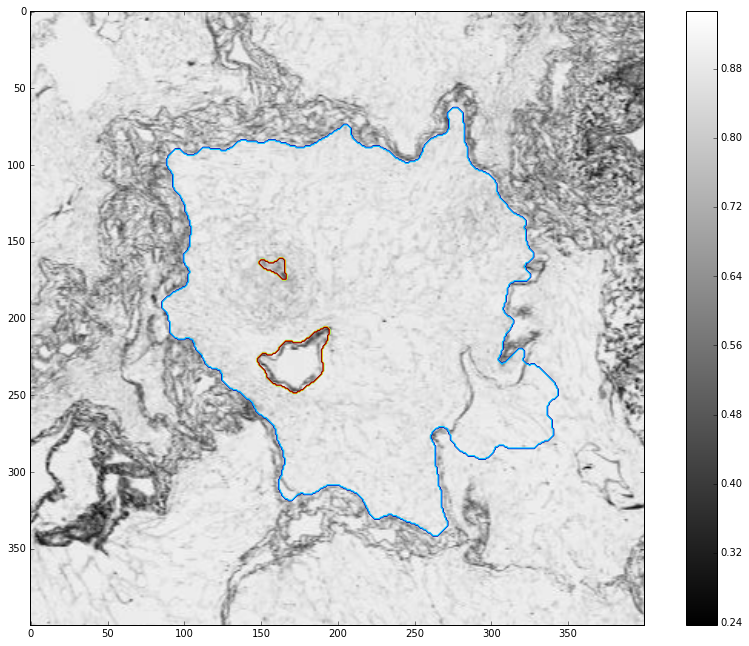

In [126]:
lobulus = inner + outer

plt.figure(figsize=(15,11))
plt.imshow(imgr, cmap="gray")
plt.colorbar()
plt.contour(lobulus)


## Transfer segmentation to different level

In [172]:
new_level = int(1)
location
former_level = level
former_size = size


imsl.level_downsamples

scale_factor = imsl.level_downsamples[former_level] / imsl.level_downsamples[new_level]
new_size = (np.asarray(size) * scale_factor).astype(np.int)




In [173]:
newimcr = imsl.read_region(location, new_level, new_size)

new_lobulus = skimage.transform.resize(lobulus, new_size, mode="reflect")

C:\Users\miros\Miniconda3\envs\lisa36\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\miros\Miniconda3\envs\lisa36\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


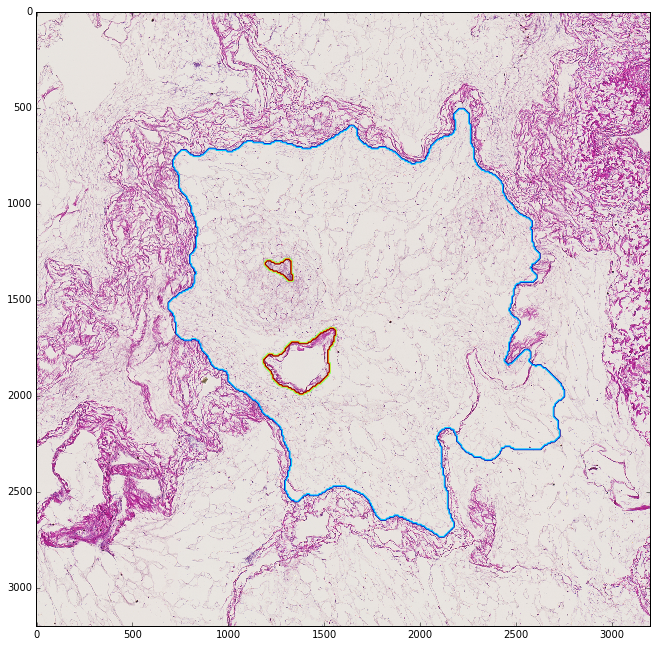

In [174]:

plt.figure(figsize=(15,11))
plt.imshow(newimcr)
# plt.colorbar()
plt.contour(new_lobulus)

## Binarization

(3200, 3200)

(3200, 3200)

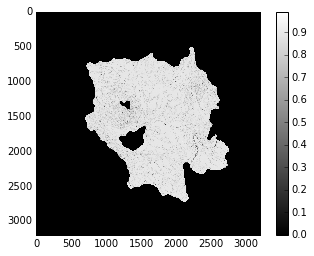

In [175]:

newimgr = skimage.color.rgb2gray(np.array(newimcr))
display(newimgr.shape)
display(new_lobulus.shape)
lobulus_area = newimgr.copy()
lobulus_area[new_lobulus!=1] = 0
plt.imshow(lobulus_area, cmap='gray')
plt.colorbar()

(array([  2.40000000e+01,   1.69000000e+02,   5.35000000e+02,
          8.67000000e+02,   1.58500000e+03,   3.29600000e+03,
          1.27500000e+04,   6.04810000e+04,   5.69197000e+05,
          4.05840000e+04]),
 array([ 0.11168431,  0.19961769,  0.28755106,  0.37548443,  0.4634178 ,
         0.55135118,  0.63928455,  0.72721792,  0.81515129,  0.90308467,
         0.99101804]),
 <a list of 10 Patch objects>)

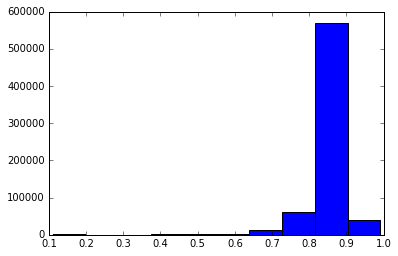

In [171]:
plt.hist(newimgr[new_lobulus==1])

In [180]:
threshold = skimage.filters.threshold_otsu(newimgr[new_lobulus==1])
threshold

0.80146771829044117

In [181]:
thrdata = newimgr[new_lobulus == 1]
import skimage.filters as skfi
skfi.threshold_niblack(thrdata)

C:\Users\miros\Miniconda3\envs\lisa36\lib\site-packages\skimage\filters\thresholding.py:777: RuntimeWarning: invalid value encountered in sqrt
  s = np.sqrt(g2 - m * m)


array([ 0.89102244,  0.89145211,  0.8909901 , ...,  0.89806515,
        0.89793028,  0.89785225])

In [185]:
thrdata = newimgr[new_lobulus == 1]
import skimage.filters as skfi
threshold = skfi.threshold_li(thrdata)
threshold

0.80779264638868464

In [191]:
imthr = (lobulus_area < threshold)
imthr[new_lobulus != 1] = 0

In [208]:
view = [slice(1000, 1500), slice(1000, 2000)]

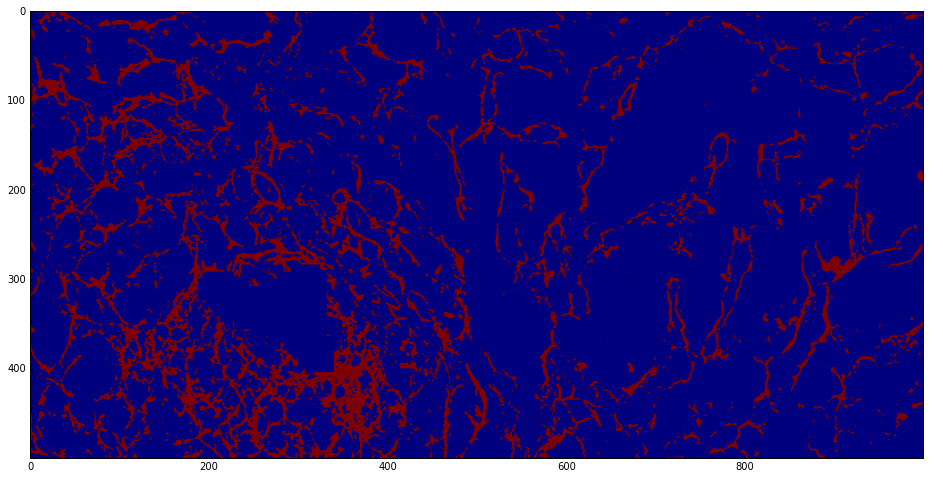

In [209]:
plt.figure(figsize=(16,11))
plt.imshow(imthr[view])

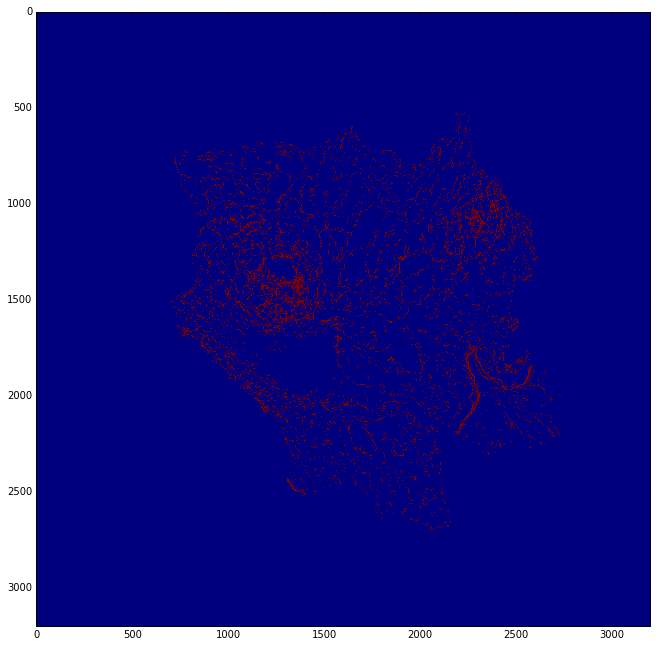

In [210]:
plt.figure(figsize=(16,11))
plt.imshow(imthr)

## Skeletonization

C:\Users\miros\Miniconda3\envs\lisa36\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\miros\Miniconda3\envs\lisa36\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


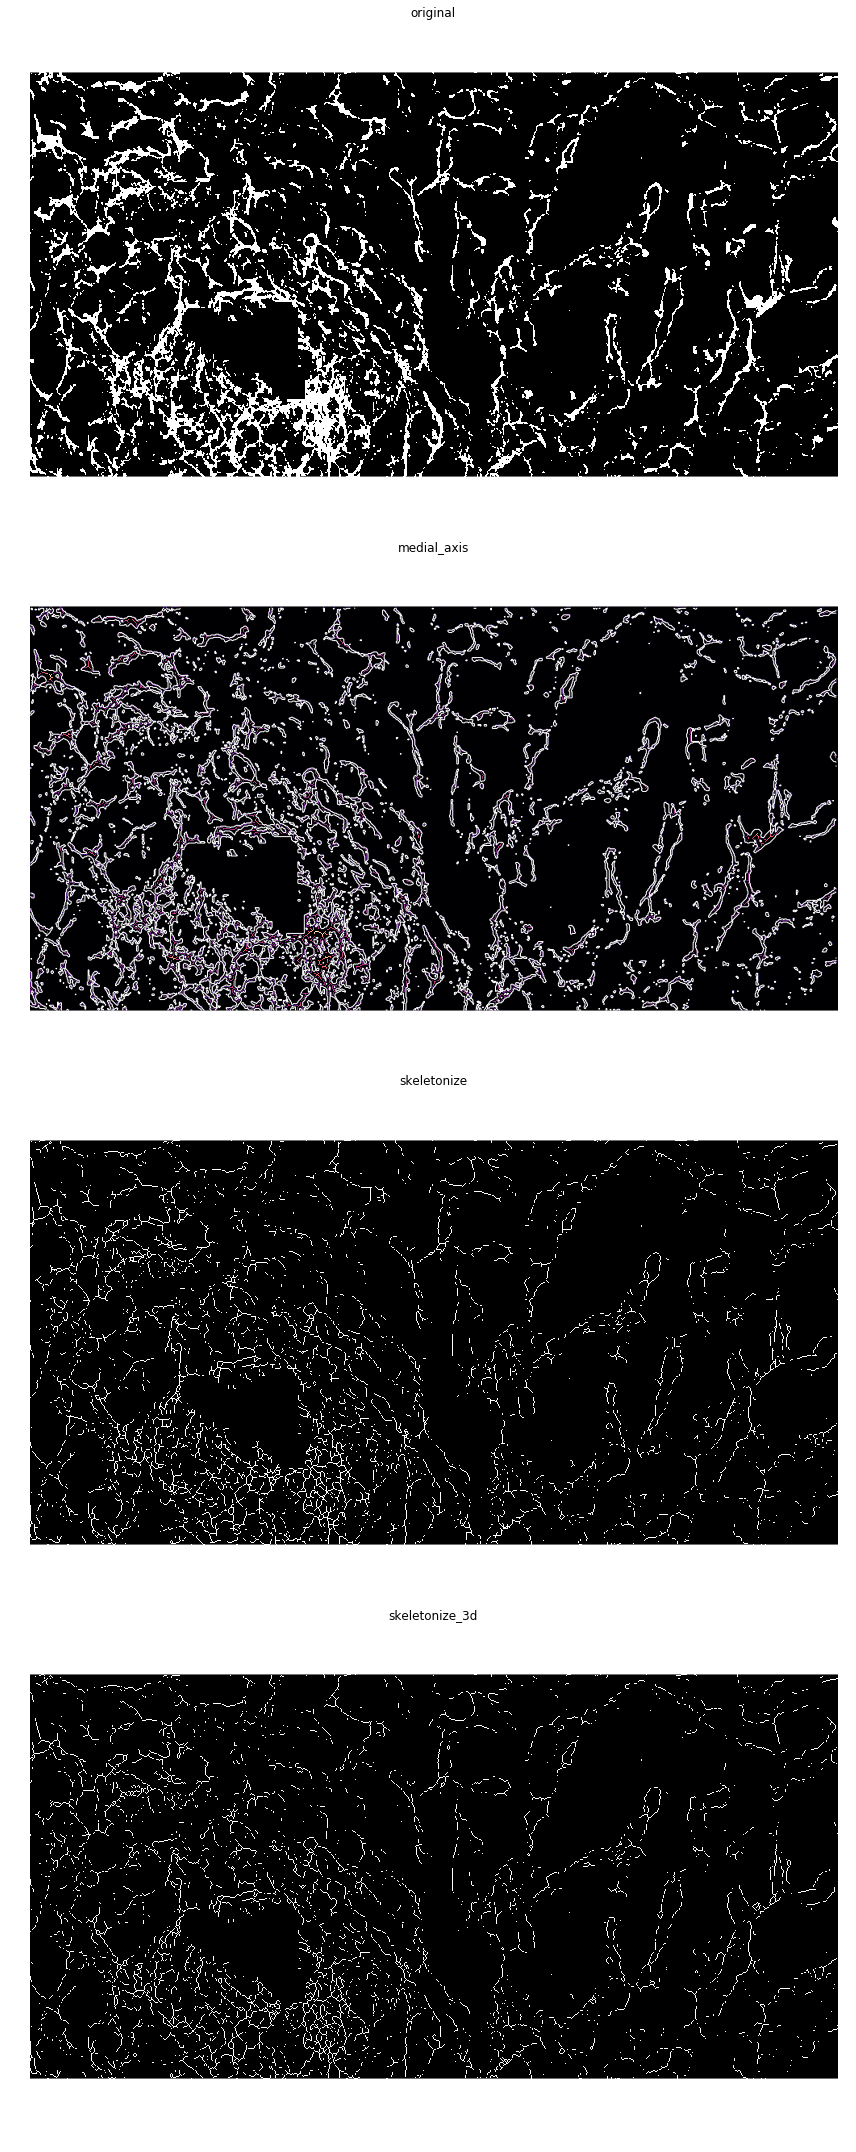

In [215]:
from skimage.morphology import medial_axis, skeletonize, skeletonize_3d

data = imthr[view]

# Compute the medial axis (skeleton) and the distance transform
skel, distance = medial_axis(data, return_distance=True)

# Compare with other skeletonization algorithms
skeleton = skeletonize(data)
skeleton3d = skeletonize_3d(data)

# Distance to the background for pixels of the skeleton
dist_on_skel = distance * skel

fig, axes = plt.subplots(4, 1, figsize=(12, 30), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(data, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('original')
ax[0].axis('off')

ax[1].imshow(dist_on_skel, cmap='magma', interpolation='nearest')
ax[1].contour(data, [0.5], colors='w')
ax[1].set_title('medial_axis')
ax[1].axis('off')

ax[2].imshow(skeleton, cmap=plt.cm.gray, interpolation='nearest')
ax[2].set_title('skeletonize')
ax[2].axis('off')

ax[3].imshow(skeleton3d, cmap=plt.cm.gray, interpolation='nearest')
ax[3].set_title('skeletonize_3d')
ax[3].axis('off')

fig.tight_layout()
plt.show()

## Texture analysis

# Read annotation from json

In [ ]:
def read_annotations(pth):
    fn = pth + ".ndpa.json"
    with open(fn) as f:
        data = json.load(f)
    return data

In [ ]:
annotations = read_annotations(pth)
len(annotations)

In [ ]:
def plot_annotations(annotations):
    for annotation in annotations:
        plt.hold(True)
        plt.plot(annotation["x"], annotation["y"], c=annotation["color"])
plot_annotations(annotations)

# Combine image data with annotation

In [ ]:
import pandas as pd
df = pd.DataFrame(annotations[0])
location0 = (df.x.min(), -df.y.max())
location0

In [ ]:
level = 6
display(imsl.level_dimensions)
imcr = imsl.read_region(location0, level ,(1000,1000))
imcr